In [1]:
import sys

sys.path.append('..')

In [2]:
from pathlib import Path

import numpy as np
from ipywidgets import interact
from PIL import Image, ImageDraw
from wand.image import Image as WImage

from digi_leap.label import Label, BLACK, WHITE

In [3]:
DATA_DIR = Path('..') / 'data'
LABELS_DIR = DATA_DIR / 'labels' / 'typewritten'
# LABELS_DIR = DATA_DIR / 'labels' / 'handwritten'

In [4]:
IMAGES = sorted(LABELS_DIR.glob('*.jpg'))

IDX = 3240  # A target image with plenty of underlines

### Display the raw image

../data/labels/typewritten/11782823.jpg


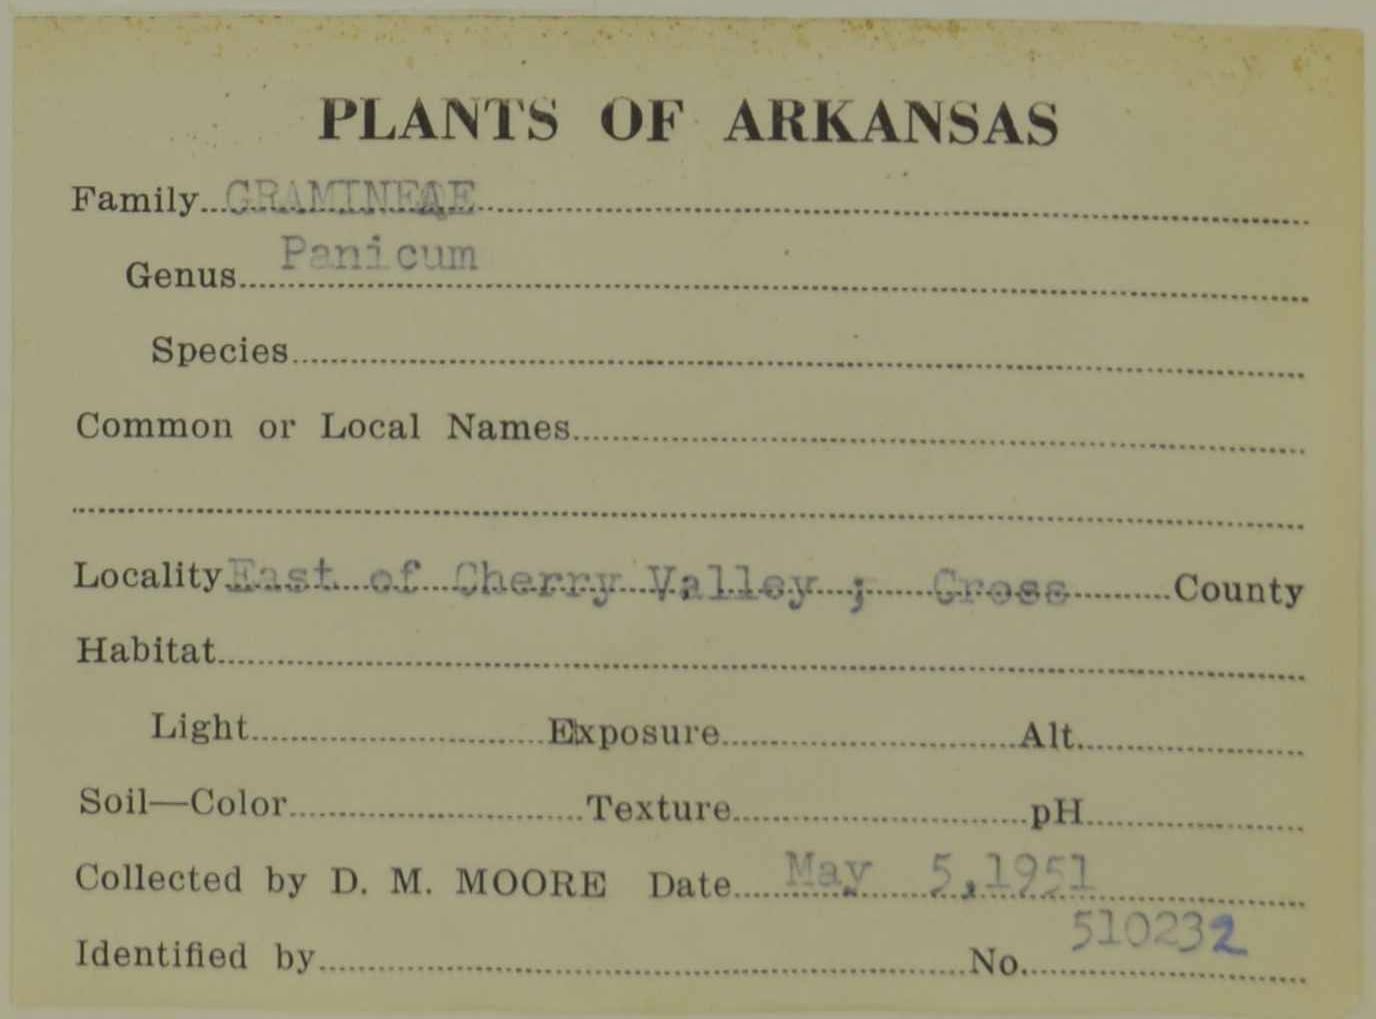

In [5]:
def raw_image(idx):
    path = IMAGES[idx]
    print(path)
    image = Image.open(path)
    display(image)


raw_image(IDX)
# interact(raw_image, idx=(0, len(IMAGES) - 1))

### Display the problem with underlines

../data/labels/typewritten/11782823.jpg 

 

TTT Seon STENT Te _ - oTg7
‘PLANTS OF: ARKAN SAS.
Family.. “GRA MINTS E stesiseessengeaiesseseacsiarssessesssetussassavssussenesesssecssesersnsseseuseneeess
' Panicum
| GeO TUBS. ice cieeetenenenescecsersenssseassnesacansossesseaenssoeesebersnassansnstoneseratericentens
| SOCIO... esrecseestenessegeeeressssnessecsensntseseessnsntsscnsseseresssaseasenvenecesassesieesesses
Common or Local Name’,.....csescsssssessssepssneeccnesenesesteesiessssecsessassesssessee
Localityasth..of.. Cherry. Valboyenj Fees FD.G Gperenseeece County
Habitat. eens sesssseseuannsneeceeceetugisosassensaeeensatustsnssenescenssunnennacesesssaresaeneccc
LABN EL. cecsesacesncseceeles -.Exposur Oveessecrectesessceceenneee sone Alte ccccseseseeee
SOU—ColOY.........eecssesececessoeees Texture assrensesseteeseravensnsesees pH

Ree Demeneemawersenane

Collected by D, M. MOORE Date... MAY.....2a4981

se heweels Kan seendecveceeeconsvecans

10234
Identified by No 2 32

Daca eeener

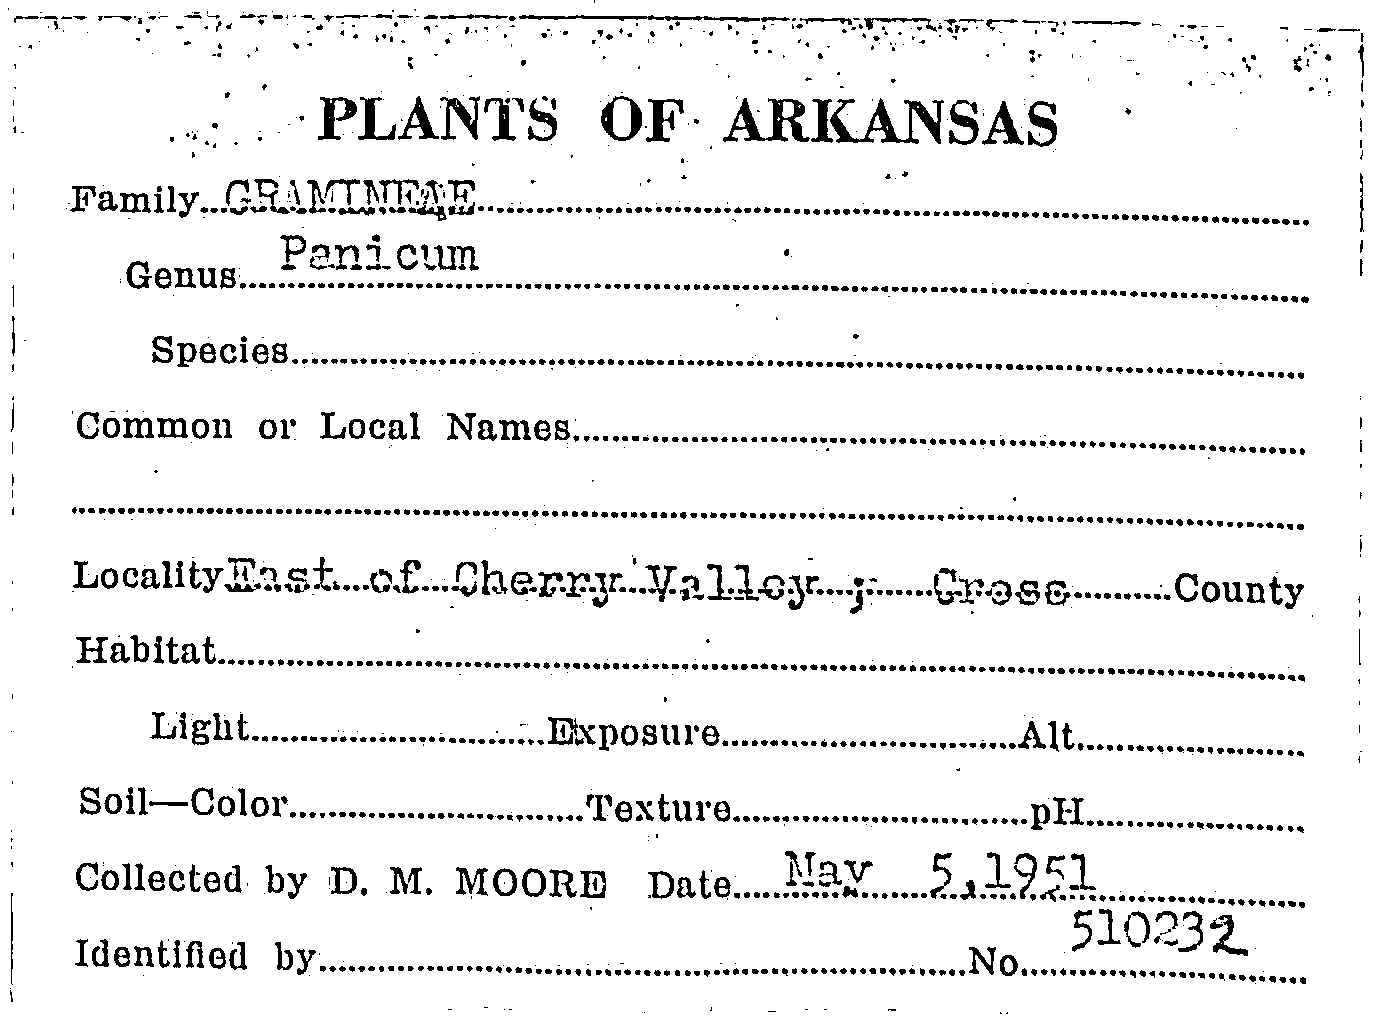

In [6]:
def problem(idx):
    label = Label(IMAGES[idx])
    label.binarize()
    text = label.ocr_text()

    print(label.path, '\n')
    print(text)
    display(label.to_pil())


problem(IDX)
# interact(problem, idx=(0, len(IMAGES) - 1))

### Find lines

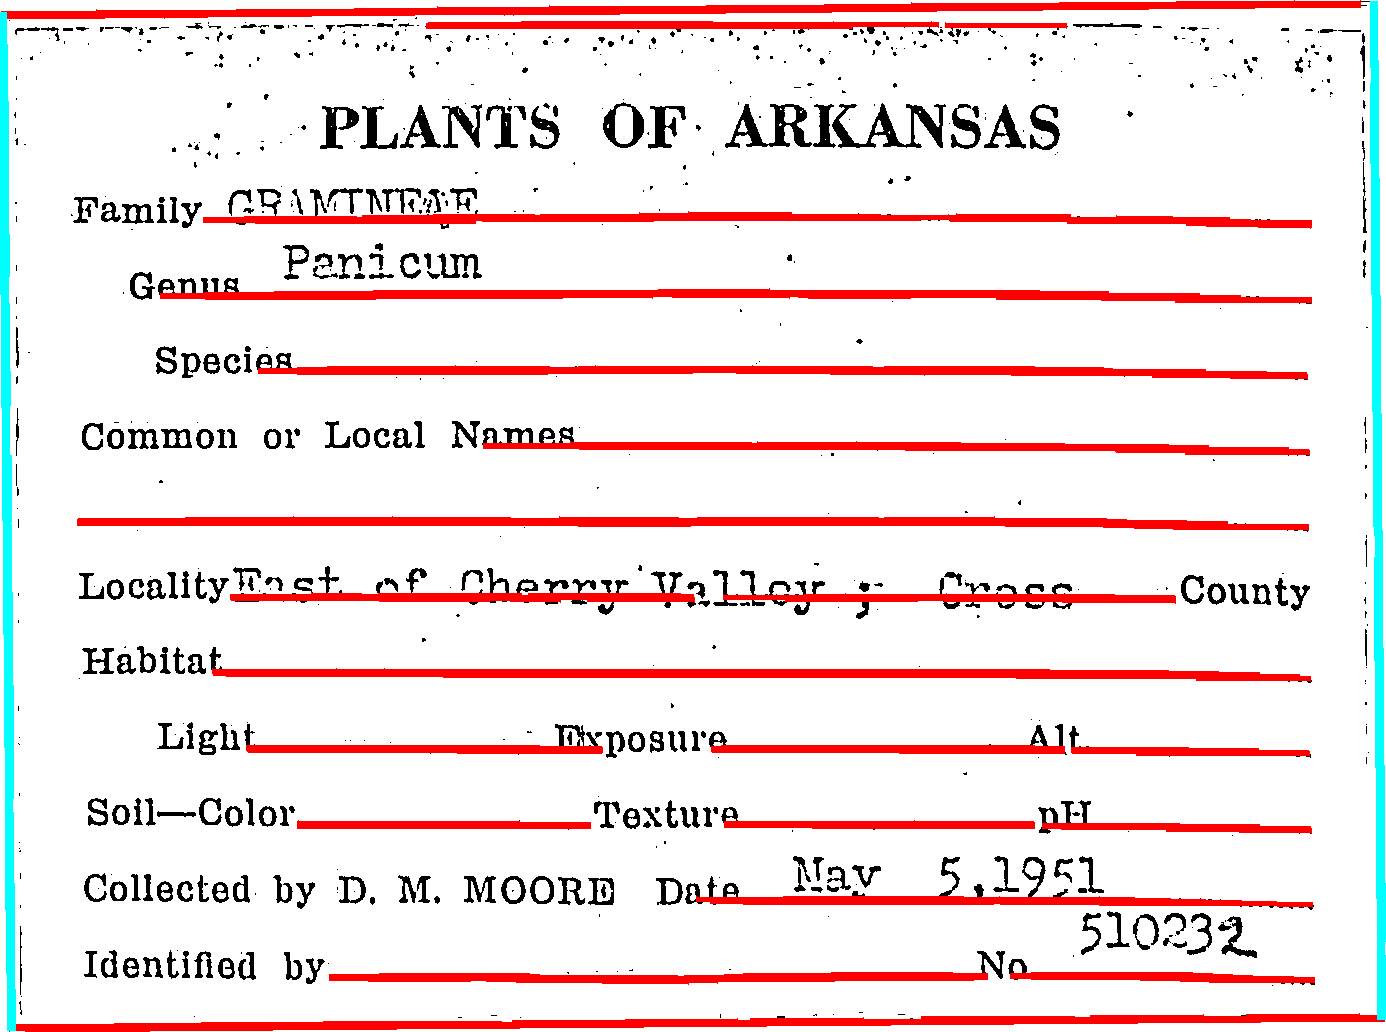

In [7]:
def show_lines(idx):
    label = Label(IMAGES[idx])
    label.deskew()
    label.binarize()

    h_lines = label.find_horizontal_lines(line_length=100, line_gap=5)
    v_lines = label.find_vertical_lines(line_length=100, line_gap=5)

    label.background = WHITE
    image = label.to_pil()

    image = image.convert('RGB')
    draw = ImageDraw.Draw(image)

    for line in h_lines:
        draw.line(line, width=6, fill=(255, 0, 0))

    for line in v_lines:
        draw.line(line, width=6, fill=(0, 255, 255))

    display(image)


show_lines(IDX)
# interact(show_lines, idx=(0, len(IMAGES) - 1))

### Remove lines

mgr omar Se tee STR, a . wey 2 Bie oan * ae

PLANTS: oF. ARKANSAS
Family. Gg BRANT NEAR
Genus Panicum
| Species

| Common or Local Names

LocalityEast of Sherry Valley ; Grose County
Habitat
Light . Tiyposure Alt
Soil—Color : Texture . pH
Collected by D. M. MOORE Date Nay 5 1961
| 510232,

Identified by Daac No,



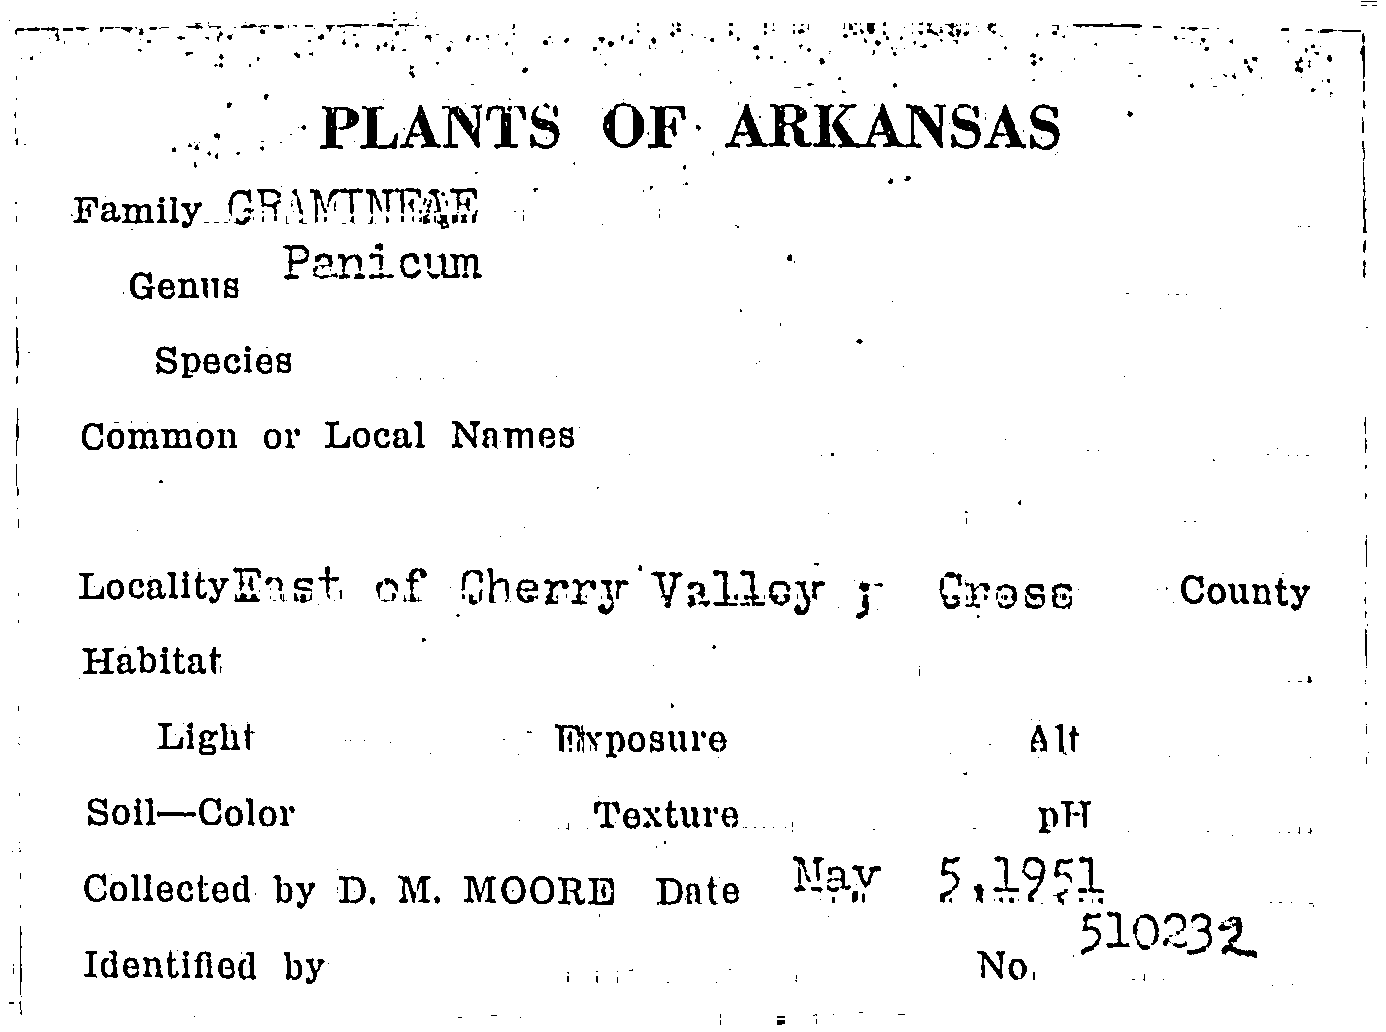

In [8]:
def remove_lines(idx):
    label = Label(IMAGES[idx])
    label.deskew()
    label.binarize()

    h_lines = label.find_horizontal_lines(line_length=100, line_gap=5)
    label.remove_horiz_lines(h_lines, line_width=6, window=20, threshold=2)

    v_lines = label.find_vertical_lines(line_length=100, line_gap=5)
    label.remove_vert_lines(v_lines, line_width=6, window=20, threshold=2)

    text = label.ocr_text()

    image = label.to_pil()
    draw = ImageDraw.Draw(image)
    print(text)
    display(image)


remove_lines(IDX)
# interact(remove_lines, idx=(0, len(IMAGES) - 1))

In [9]:
%%javascript
$('.output_label').css('font-size', '16pt')

<IPython.core.display.Javascript object>